1. Importe as bibliotecas pandas e matplotlib, usando a palavra mágica inline para exibir as visualizações no notebook; e carregue os dados, que estão disponibilizados neste link:dados, em um DataFrame. Assim, você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente;
2. Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo;
3. Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015.

## 1. Importe as bibliotecas pandas e matplotlib, usando a palavra mágica inline para exibir as visualizações no notebook; e carregue os dados, que estão disponibilizados neste link:dados, em um DataFrame. Assim, você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente;

In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
jogos = pd.read_csv("https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/vgsales.csv")
jogos.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 2. Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo;

Criando um Dataframe apenas com os dados da Nintendo

In [52]:
jogos_nintendo = jogos[jogos.Publisher== "Nintendo"].copy()
jogos_nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Classificando por Genero

In [53]:
generos_jogos = jogos_nintendo.groupby(by='Genre').sum()
genero_jogos.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Sports,17419112,4620621.0,683.35,376.85,135.37,134.97,1330.93
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37
Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37


In [ ]:
quantidade_jogos = jogos_nintendo.groupby(by='').sum()
genero_jogos.head()

Plotando o gráfico por proporção. 

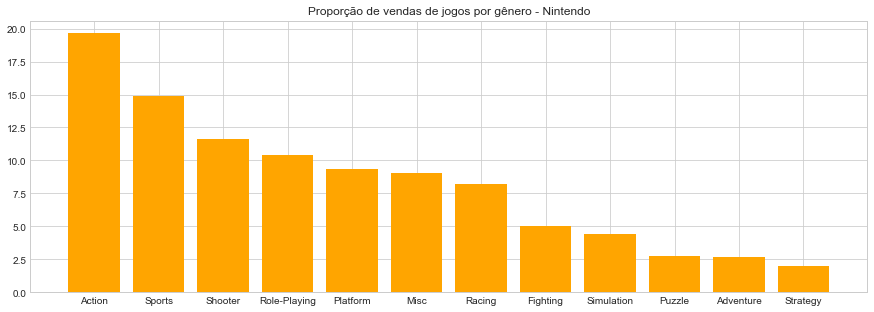

In [54]:
genero_jogos = genero_jogos.sort_values(by='Global_Sales',ascending=False)
porcentagens = genero_jogos['Global_Sales']*100.0/genero_jogos['Global_Sales'].sum()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,5))
plt.bar(genero_jogos.index,porcentagens, color = "orange")
plt.title('Proporção de vendas de jogos por gênero - Nintendo')
plt.show()

## 3. Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015.

criando um Dataframe em que o Ano é maior ou igual a 2015 

In [57]:
jogos_ano = jogos[jogos.Year>= 2015 ].copy()
jogos_ano.shape
jogos_ano.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96


In [66]:
jogos_anos = jogos_ano.groupby(by='Platform').sum()
jogos_anos.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
3DS,1240523,243850.0,6.65,5.34,20.42,1.11,33.59
DS,5959,2020.0,0.27,0.00,0.00,0.02,0.29
PC,1069198,177358.0,3.04,6.87,0.00,0.72,10.67
PS3,1169252,213622.0,5.16,8.23,4.80,2.57,20.81
PS4,2143749,493784.0,52.62,67.91,10.45,23.59,154.58


ValueError: Could not interpret input 'Platform'

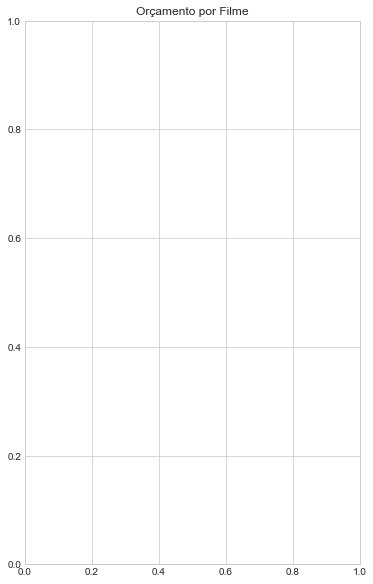

In [67]:
plt.figure(figsize = (6,10))
plt.title("Orçamento por Filme")
sns.barplot(y="Platform" , x='Year', color = "r", ci=None, data=jogos_anos)
plt.show()

In [ ]:
generos_jogos = jogos_nintendo.groupby(by='Genre').sum()
genero_jogos.head()